In [6]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')
from IPython.display import display, HTML, display_html
import seaborn as sns
import datetime

# Machine Learning Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# Train-test split
from sklearn.model_selection import train_test_split


# Hyperparameter tuning
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


# Metrics

from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score

# Additionals

from pprint import pprint
from math import sqrt


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, LabelSet
from bokeh.io import output_notebook, show
from bokeh.models import LinearColorMapper, ColorBar
from bokeh.transform import transform
from bokeh.models import HoverTool
from bokeh.models.ranges import Range1d
from bokeh.models import HoverTool,WheelZoomTool, PanTool, ResetTool
from bokeh.models import BoxSelectTool
from bokeh.layouts import gridplot
#from bokeh.models.widgets import CheckboxGroup, Slider, RangeSlider, Tabs, TableColumn, DataTable
#from bokeh.layouts import column, row, WidgetBox
from bokeh.models import CategoricalColorMapper, HoverTool, ColumnDataSource, Panel

In [7]:
df1 = pd.read_csv('Well_21.csv')
# Dataset is now stored in a Pandas Dataframe
df1.head(3)

,DEPTH,ROP,WOB,CO2,CH4,H2S,TEMPIN,TEMPOUT,FRACT,MUDLOSS,...,VOLCSEDI,CHERTARG,MARL,CLAYST%,CLAY%,SILTST%,SANDST%,SAND%,MEDSAND%,CRSSAND
0,130,0,1,0,0,0,0,0,0,0,...,0,0,0,0,40,0,0,60,0,0
1,131,498,0,206,0,0,55,55,0,0,...,0,0,0,0,40,0,0,60,0,0
2,132,675,0,206,0,0,56,55,0,0,...,0,0,0,0,40,0,0,60,0,0


In [8]:
df1.columns

Index(['DEPTH', 'ROP', 'WOB', 'CO2', 'CH4', 'H2S', 'TEMPIN', 'TEMPOUT',
       'FRACT', 'MUDLOSS', 'QUARTZIT', 'CALCITE', 'PYRITE', 'HEMATITE',
       'EPIDOTAL', 'CHLORITE', 'ANHYDRIT', 'SERICITE', 'PP', 'SPM1', 'SPM2',
       'FLOWIN', 'FLOWOUT%', 'GAINLOSS', 'RPM', 'TORQUE', 'PITVOL', 'TUFFASH ',
       'RHYOLITE', 'BASALT', 'VOLCAN', 'ANDESITE', 'DACITE', 'TUFFCRYS',
       'VOLCSEDI', 'CHERTARG', 'MARL', 'CLAYST%', 'CLAY%', 'SILTST%',
       'SANDST%', 'SAND%', 'MEDSAND%', 'CRSSAND'],
      dtype='object')

In [9]:
dfnew= df1.filter(['ROP', 'DEPTH','WOB','TEMPIN','TEMPOUT','FLOWIN','FLOWOUT%','RPM','TORQUE'], axis=1)

dfnew.shape

(5979, 9)

In [10]:
dfnew.describe()

,ROP,DEPTH,WOB,TEMPIN,TEMPOUT,FLOWIN,FLOWOUT%,RPM,TORQUE
count,5979.000000,5979.000000,5979.000000,5979.000000,5979.000000,5979.000000,5979.000000,5979.000000,5979.000000
mean,98.837933,3119.000000,10.131962,107.830406,117.193009,712.113397,42.332497,59.585215,1934.167252
std,116.417445,1726.132961,8.345709,19.431197,21.131624,95.939043,6.621601,14.922076,1365.923365
min,0.000000,130.000000,-4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1624.500000,2.000000,98.000000,107.000000,662.000000,39.000000,54.000000,238.500000
50%,49.000000,3119.000000,8.000000,110.000000,120.000000,734.000000,43.000000,59.000000,2148.000000
75%,128.000000,4613.500000,18.000000,118.000000,132.000000,760.000000,46.000000,68.000000,3134.000000
max,888.000000,6108.000000,30.000000,142.000000,165.000000,799.000000,56.000000,102.000000,4850.000000


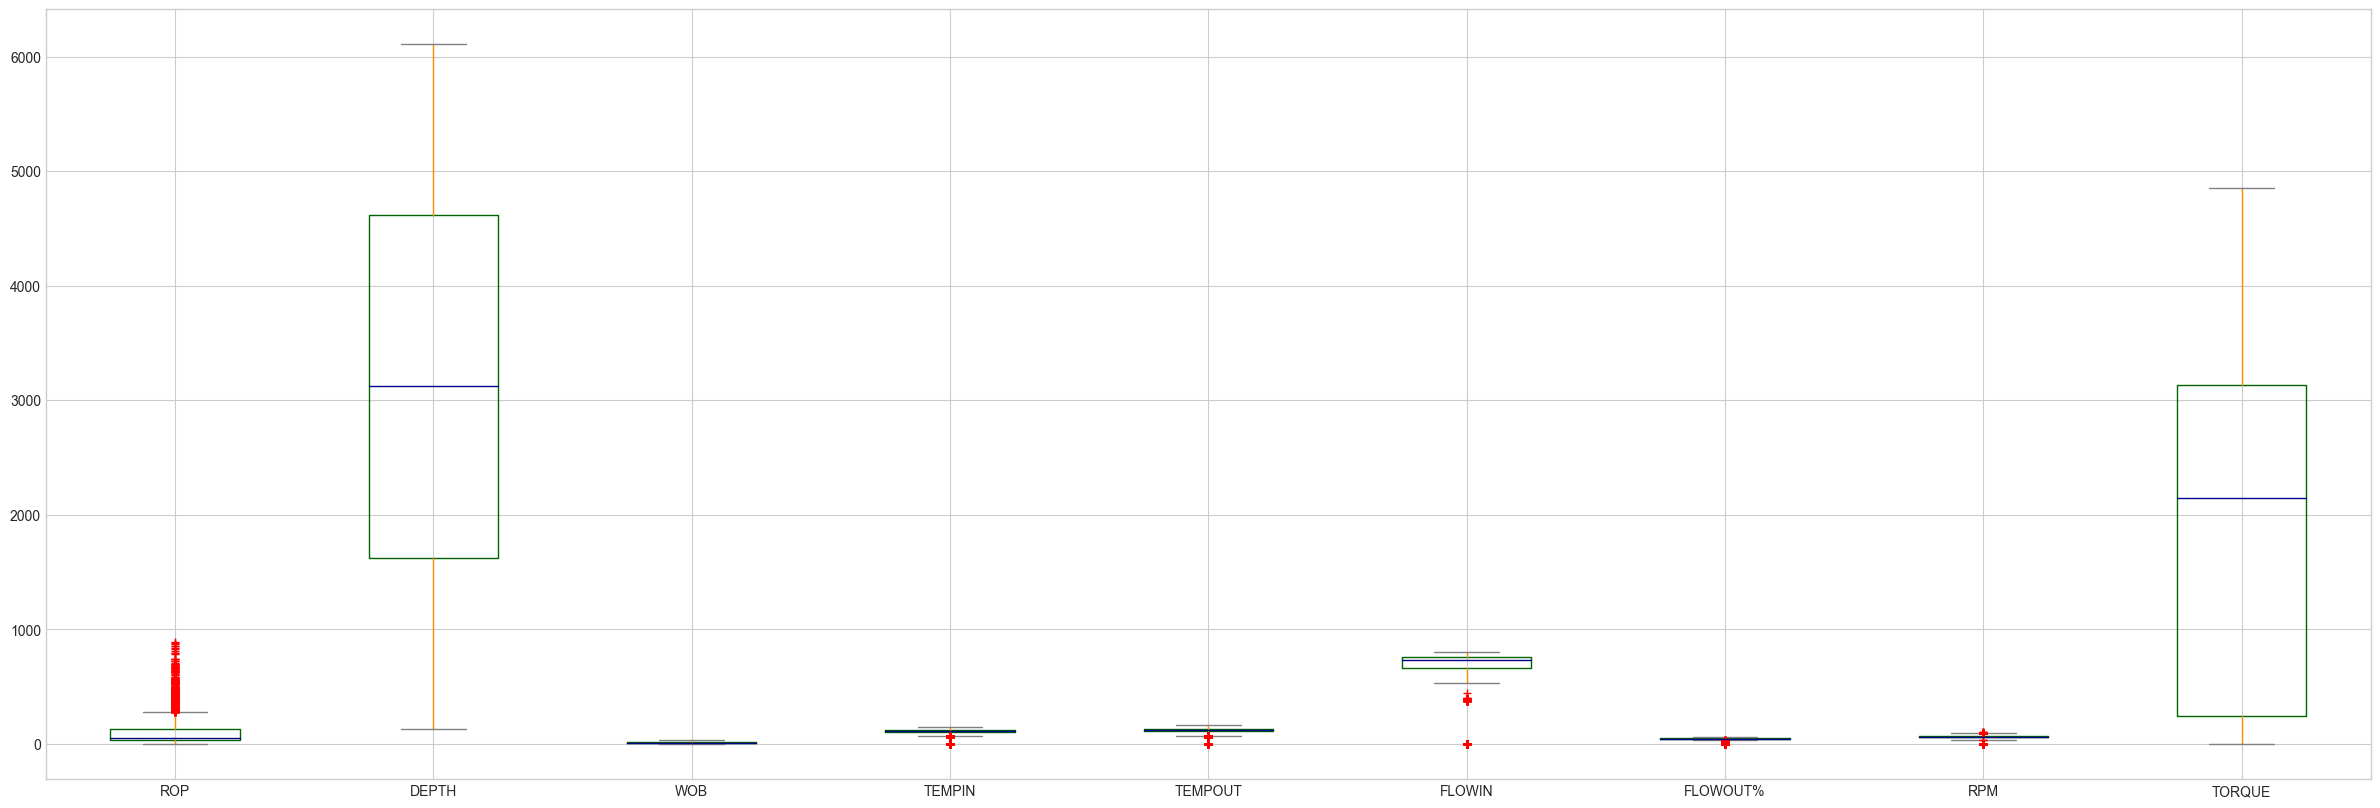

In [11]:
color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange', 'medians': 'DarkBlue', 'caps': 'Gray'}
bp=dfnew.plot.box(color=color, sym='r+', figsize=(30,10))

In [12]:
dfnew_lstm=np.array(dfnew)

In [13]:
min_max_scaler=preprocessing.StandardScaler()
np_scaled=min_max_scaler.fit_transform(dfnew_lstm)
df_scaled=pd.DataFrame(np_scaled)
print ('Sacaled shape:', df_scaled.shape)
df_scaled.head(2)

Sacaled shape: (5979, 9)


,0,1,2,3,4,5,6,7,8
0,-0.849067,-1.731761,-1.094302,-5.549809,-5.546323,-7.423182,-6.393626,-3.993426,-1.416133
1,3.429000,-1.731182,-1.214134,-2.719072,-2.943371,-0.459845,-1.107453,-0.173262,-1.416133


In [14]:
numerical_cols=['ROP', 'DEPTH','WOB','TEMPIN','TEMPOUT','FLOWIN','FLOWOUT%','RPM','TORQUE']

In [15]:
scaler_all_data = MinMaxScaler()
data_scaled = scaler_all_data.fit_transform(dfnew)
df_data_scaled=pd.DataFrame(data_scaled)
df_data_scaled.columns = numerical_cols
df_data_scaled.head(5)


,ROP,DEPTH,WOB,TEMPIN,TEMPOUT,FLOWIN,FLOWOUT%,RPM,TORQUE
0,0.000000,0.000000,0.147059,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.560811,0.000167,0.117647,0.387324,0.333333,0.836045,0.625000,0.558824,0.0
2,0.760135,0.000335,0.117647,0.394366,0.333333,0.836045,0.571429,0.558824,0.0
3,0.614865,0.000502,0.147059,0.394366,0.333333,0.834793,0.589286,0.539216,0.0
4,0.500000,0.000669,0.147059,0.394366,0.333333,0.834793,0.589286,0.529412,0.0


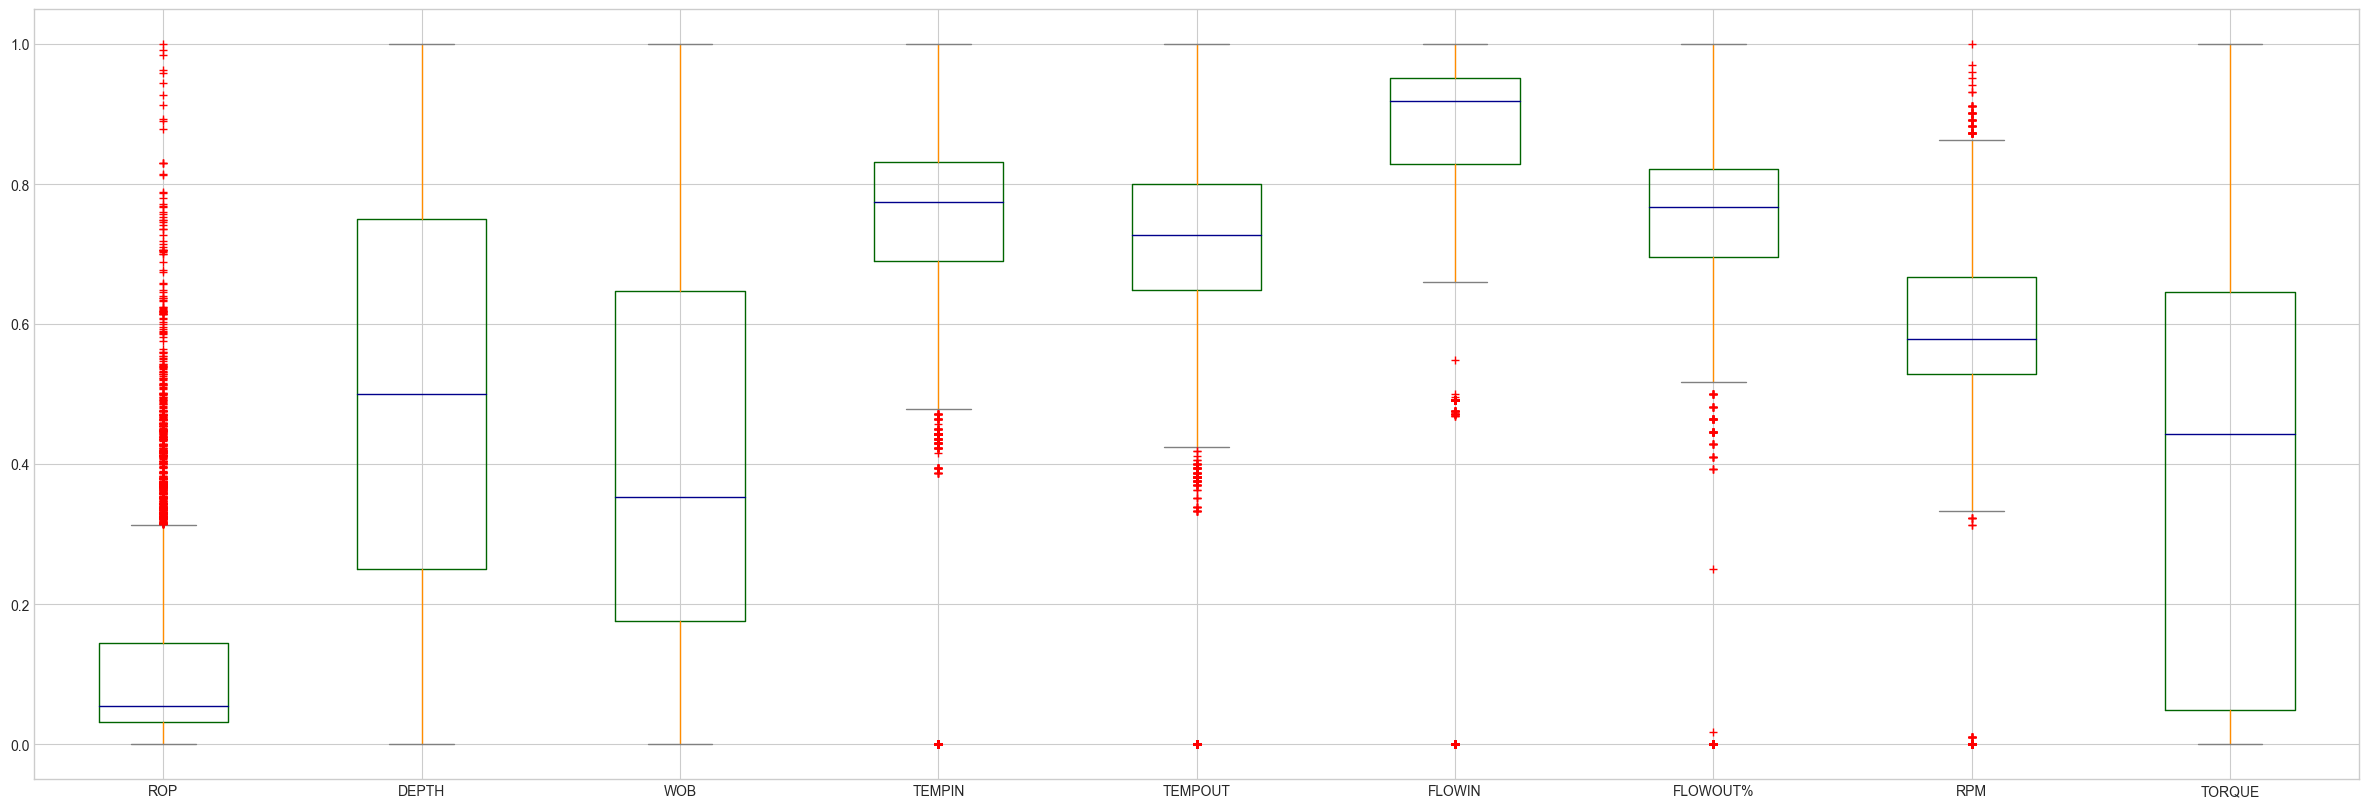

In [16]:
olor = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange', 'medians': 'DarkBlue', 'caps': 'Gray'}
bp_scaled_all_data = df_data_scaled.plot.box(color=color, sym='r+' ,figsize=(30,10))

In [67]:
#@Select variable

from bokeh.models import Span
Variable = 'TEMPIN' #@param ['ROP', 'DEPTH','WOB','TEMPIN','TEMPOUT','FLOWIN','FLOWOUT%','RPM','TORQUE']
#@title
output_notebook()
variable = Variable
source = ColumnDataSource(dfnew)
color_mapper = LinearColorMapper(palette="Viridis256", low=dfnew[variable].min(), high=dfnew[variable].max())



hover = HoverTool(tooltips=[
    ('Depth', '@{DEPTH}'), 
    ('ROP', '@{ROP}'),
  	 ])
tools = [PanTool(), WheelZoomTool(), ResetTool(), hover, 'box_select', 'lasso_select', 'save']



p_r = figure(x_axis_label='ROP (ft/hr)', y_axis_label='DEPTH (ft)', tools=tools, title="Rate of penetration", height=1000, width=600)
p_r.circle(x='ROP', y='DEPTH', color=transform(variable, color_mapper), size=3, alpha=0.6, source=source)
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=12, location=(0,0), title=variable)
p_r.add_layout(color_bar, 'right')


upper = Span(location=1950, dimension='width', line_color='red', line_dash='dashed', line_width=3)
p_r.add_layout(upper)
upper = Span(location=2630, dimension='width', line_color='red', line_dash='dashed', line_width=3)
p_r.add_layout(upper)
upper = Span(location=2810, dimension='width', line_color='red', line_dash='dashed', line_width=3)
p_r.add_layout(upper)
upper = Span(location=5445, dimension='width', line_color='red', line_dash='dashed', line_width=3)
p_r.add_layout(upper)
upper = Span(location=6060, dimension='width', line_color='red', line_dash='dashed', line_width=3)
p_r.add_layout(upper)
upper = Span(location=6210, dimension='width', line_color='red', line_dash='dashed', line_width=3)
p_r.add_layout(upper)

xmax = dfnew['ROP'].max()
xmin = dfnew['ROP'].min()
ymax = dfnew['DEPTH'].min()
ymin = dfnew['DEPTH'].max()
p_r.x_range = Range1d(xmin, xmax)
p_r.y_range = Range1d(ymin, ymax)


show(p_r)

Loading BokehJS ...

In [18]:
X = dfnew[dfnew.columns.difference(['ROP'])]
y = dfnew[['ROP']]
print('Features shape:', X.shape)
print('Target shape', y.shape)

Features shape: (5979, 8)
Target shape (5979, 1)


In [19]:
X1=np.array(X)
y1=np.array(y)
print('Features shape:', X1.shape)
print('Target shape', y1.shape)

Features shape: (5979, 8)
Target shape (5979, 1)


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=42)
print('X train:', X_train.shape)
print('X test:', X_test.shape)
print('y train:', y_train.shape)
print('y test:', y_test.shape)

X train: (4185, 8)
X test: (1794, 8)
y train: (4185, 1)
y test: (1794, 1)


In [21]:
from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler().fit(X_train)
scalery = StandardScaler().fit(y_train)
X_train_scaled = scalerX.transform(X_train)
y_train_scaled = scalery.transform(y_train)
X_test_scaled = scalerX.transform(X_test)
y_test_scaled = scalery.transform(y_test)

In [22]:
# Random analysis to fit Random forest 
rf = RandomForestRegressor(random_state=42).fit(X_train, y_train) #Random_state is the seed used by the random number generator
predictions_rf = rf.predict(X_test)

# Metrics
print('Model score:',              round(rf.score(X_test, y_test),2))
print('Mean absolute error:',      round(mean_absolute_error(y_test, predictions_rf),2))
print('Root mean squared error:',  round(sqrt(mean_squared_error(y_test, predictions_rf)),2))
print('R2:',                       round(r2_score(y_test, predictions_rf),2))

Model score: 0.82
Mean absolute error: 25.52
Root mean squared error: 48.49
R2: 0.82


In [23]:
# List of features
feature_list = list(X.columns)

# Get numerical feature importances (Gini importance)
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: DEPTH                Importance: 0.75
Variable: TORQUE               Importance: 0.08
Variable: RPM                  Importance: 0.04
Variable: TEMPOUT              Importance: 0.04
Variable: TEMPIN               Importance: 0.03
Variable: WOB                  Importance: 0.03
Variable: FLOWOUT%             Importance: 0.02
Variable: FLOWIN               Importance: 0.01


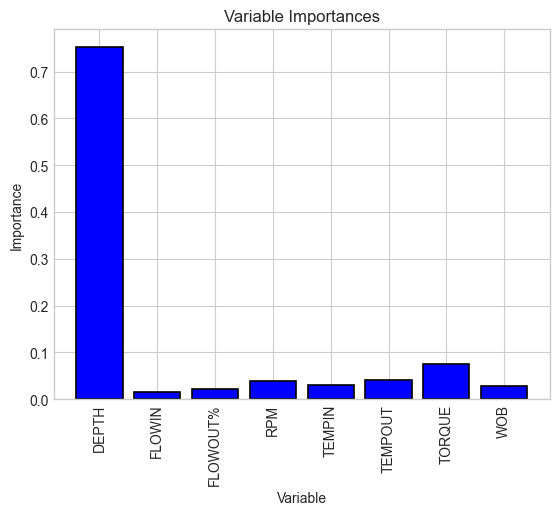

In [24]:
# list of x locations for plotting
X_testues = list(range(len(importances)))

# Make a bar chart
plt.bar(X_testues, importances, orientation = 'vertical', color = 'b', edgecolor = 'k', linewidth = 1.2)

# Tick labels for x axis
plt.xticks(X_testues, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

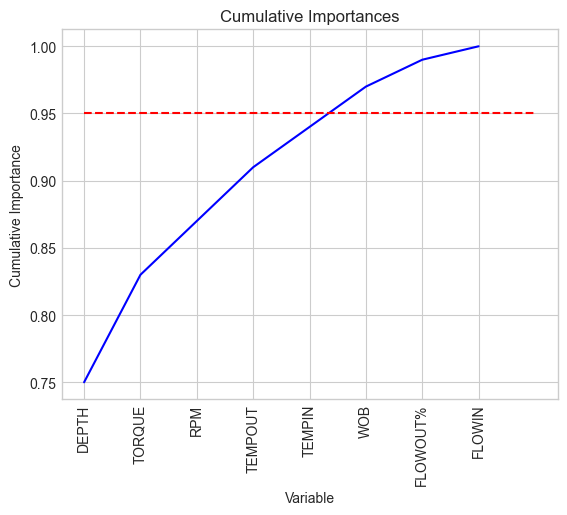

In [25]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]

# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)

# Make a line graph
plt.plot(X_testues, cumulative_importances, 'b-')

# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')

# Format x ticks and labels
plt.xticks(X_testues, sorted_features, rotation = 'vertical')

# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

In [26]:
# Find number of features for cumulative importance of 95%
# Add 1 because Python is zero-indexed
print('Number of features for 95% importance:', np.where(cumulative_importances > 0.95)[0][0] + 1)

Number of features for 95% importance: 6


In [27]:
# Extract the names of the most important features
important_feature_names = [feature[0] for feature in feature_importances[0:6]]
# Find the columns of the most important features
important_indices = [feature_list.index(feature) for feature in important_feature_names]
important_indices
# # Create training and testing sets with only the important features
important_train_features = X_train[:, important_indices]
important_val_features = X_test[:, important_indices]

# # Sanity check on operations
print('Important train features shape:', important_train_features.shape)
print('Important val features shape:', important_val_features.shape)

Important train features shape: (4185, 6)
Important val features shape: (1794, 6)


In [28]:
# Train the expanded model on only the important features
rf.fit(important_train_features, y_train);

In [29]:
# Make predictions on validation data
predictions_import = rf.predict(important_val_features)

# Metrics
print('Mean absolute error:',  round(mean_absolute_error(y_test, predictions_import),2))
print('Root mean squared error:',   round(sqrt(mean_squared_error(y_test, predictions_import)),2))
print('R2:',                   round(r2_score(y_test, predictions_import),2))
print('Explained variance score:', explained_variance_score(y_test, predictions_import))

Mean absolute error: 25.38
Root mean squared error: 48.16
R2: 0.83
Explained variance score: 0.8254456201030307


In [30]:
# We require to import the time library for the run time evaluation
import time

# All features training and testing time
all_features_time = []

# We decide to do 10 iterations and take average for all features
for _ in range(10):
    start_time = time.time()
    rf.fit(X_train, y_train)
    all_features_predictions = rf.predict(X_test)
    end_time = time.time()
    all_features_time.append(end_time - start_time)

all_features_time = np.mean(all_features_time)
print('All features total training and testing time:', round(all_features_time, 2), 'seconds.')

All features total training and testing time: 2.55 seconds.


In [31]:
# Time training and testing for reduced feature set
reduced_features_time = []

# We decide to do 10 iterations and take average for reduced features
for _ in range(10):
    start_time = time.time()
    rf.fit(important_train_features, y_train)
    reduced_features_predictions = rf.predict(important_val_features)
    end_time = time.time()
    reduced_features_time.append(end_time - start_time)

reduced_features_time = np.mean(reduced_features_time)
print('Reduced features total training and testing time:', round(reduced_features_time, 2), 'seconds.')

Reduced features total training and testing time: 1.93 seconds.


In [32]:
# Mean absolute error
all_mean_absolute_error=mean_absolute_error(y_test, predictions_rf)
reduced_mean_absolute_error=mean_absolute_error(y_test, predictions_import)

# Root squared mean error
all_root_mean_squared_error=sqrt(mean_squared_error(y_test, predictions_rf))
reduced_root_mean_squared_error=sqrt(mean_squared_error(y_test, predictions_import))

# R2 score
all_r2_score=r2_score(y_test, predictions_rf)
reduced_r2_score=r2_score(y_test, predictions_import)

# Summarize the data in a Dataframe
comparison = pd.DataFrame({'Features': ['all (8)', 'reduced (6)'], 
                           'R2': [round(all_r2_score, 2), round(reduced_r2_score, 2)],
                           'Mean absolute error': [round(all_mean_absolute_error, 2), round(reduced_mean_absolute_error, 2)],
                           'Root mean squared error': [round(all_root_mean_squared_error, 2), round(reduced_root_mean_squared_error, 2)],
                           'Run time': [round(all_features_time, 2), round(reduced_features_time, 2)]})

comparison[['Features','R2', 'Mean absolute error', 'Root mean squared error', 'Run time']]

,Features,R2,Mean absolute error,Root mean squared error,Run time
0,all (8),0.82,25.52,48.49,2.55
1,reduced (6),0.83,25.38,48.16,1.93


In [33]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [34]:
# Definition of specific parameters for Random forest 
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 2, stop = 2000, num = 20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(4, 30, num = 2)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 4, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [4, 30, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 3, 4, 5, 10],
 'n_estimators': [2,
                  107,
                  212,
                  317,
                  422,
                  527,
                  632,
                  738,
                  843,
                  948,
                  1053,
                  1158,
                  1263,
                  1369,
                  1474,
                  1579,
                  1684,
                  1789,
                  1894,
                  2000]}


In [35]:
rf = RandomForestRegressor(random_state = 42)

# Use the random grid to search for best hyperparameters
# Random search of parameters, using 3 fold cross validation, 
# search across different combinations.
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter = 15, scoring='neg_mean_absolute_error',  cv = 3, verbose=2, random_state=42, n_jobs=-1, return_train_score=True)

# Fit the random search model
rf_random.fit(X_train, y_train);

Fitting 3 folds for each of 15 candidates, totalling 45 fits


/Users/DanyTQ/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/DanyTQ/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/DanyTQ/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/DanyTQ/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionW

In [36]:
# Obtaining the best parameters
rf_random.best_params_

{'n_estimators': 1894,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': True}

In [37]:
best_random = rf_random.best_estimator_.fit(X_train, y_train)
predictions_best_random = best_random.predict(X_test)

print('Model score:', round(best_random.score(X_test, y_test),2))
print('Mean absolute error:', round(mean_absolute_error(y_test, predictions_best_random),2))
print('Root mean squared error:', round(sqrt(mean_squared_error(y_test, predictions_best_random)),2))
print('R2:', round(r2_score(y_test, predictions_best_random),2))

r2_rf=r2_score(y_test, predictions_best_random)
Mean_absolute_error_rf=mean_absolute_error(y_test, predictions_best_random)
Root_mean_squared_error_rf=sqrt(mean_squared_error(y_test, predictions_best_random))

Model score: 0.82
Mean absolute error: 25.6
Root mean squared error: 48.89
R2: 0.82


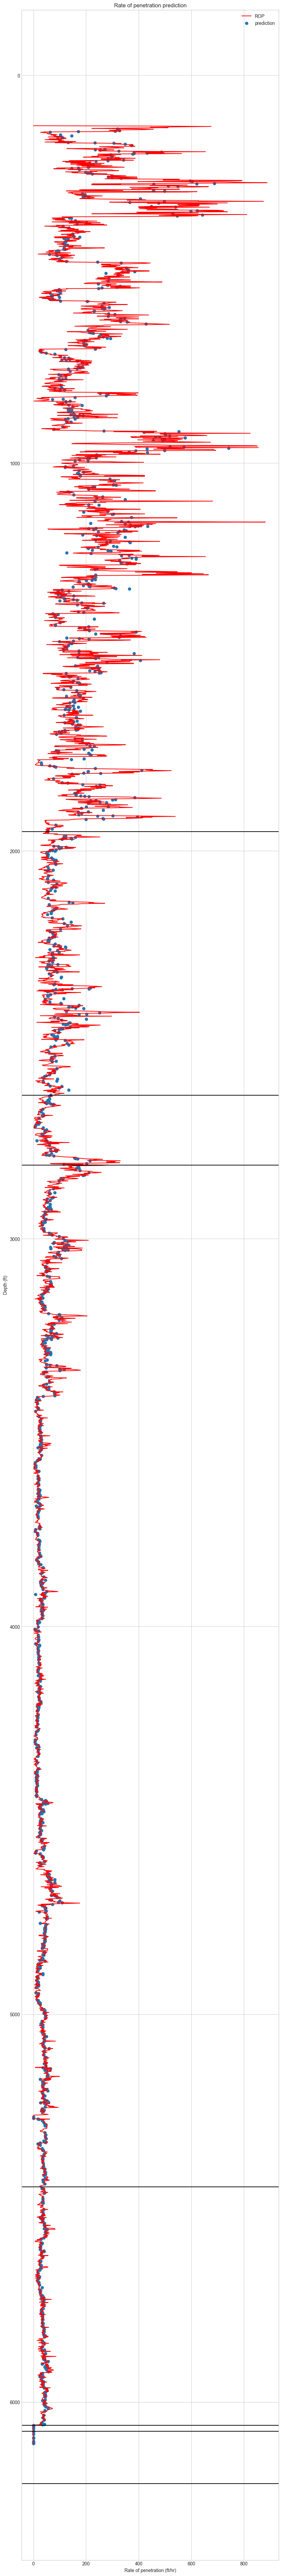

In [38]:
fig, ax=plt.subplots(figsize=(10,100))
ax.plot(y, X['DEPTH'], 'r', label = 'ROP')
#ax.scatter(y_train, X_train[:,[0]], label="train")
#ax.scatter(y_test, X_test[:,[0]], label="test")
ax.scatter(predictions_best_random , X_test[:,[0]], label="prediction")
ay = plt.gca()
ay.set_ylim(ay.get_ylim()[::-1])
plt.ylabel('Depth (ft)'); plt.xlabel('Rate of penetration (ft/hr)'); plt.title('Rate of penetration prediction');
plt.legend(loc="best")
depth = [1950, 2630, 2810, 5445, 6060, 6075, 6210, 6950, 6960, 7200, 7230, 7320, 7350, 7360, 7370, 7390, 7400, 7470, 7480, 7510, 7540, 8100]
for i in range(len(depth)):
  plt.axhline(depth[i], color='k')
plt.show()


## Prediction with Support vector machine

In [40]:
# fit a model
sv = SVR(kernel= 'rbf', degree=3, gamma='auto', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)
model_sv=sv.fit(X_train_scaled, y_train_scaled)
predictions_sv = sv.predict(X_test_scaled)

print('Model score:', round(sv.score(X_test_scaled, y_test_scaled),2))
print('Mean absolute error:', round(mean_absolute_error(y_test_scaled, predictions_sv),2))
print('Root mean squared error:', round(sqrt(mean_squared_error(y_test_scaled, predictions_sv)),2))
print('R2:', round(r2_score(y_test_scaled, predictions_sv),2))
#print('Explained variance score:', explained_variance_score(y_test, predictions_sv))


Model score: 0.61
Mean absolute error: 0.34
Root mean squared error: 0.61
R2: 0.61


In [42]:
predictions_sv_rescale = scalery.inverse_transform(predictions_sv.reshape(-1, 1), copy=None)

print('Mean absolute error:', round(mean_absolute_error(y_test_scaled, predictions_sv_rescale ),2))
print('Root mean squared error:', round(sqrt(mean_squared_error(y_test_scaled, predictions_sv_rescale)),2))

Mean absolute error: 94.18
Root mean squared error: 126.82


### Examine the default Support vector to determine parameters

In [43]:
# Look at parameters used by our current support vector regressor
print('Parameters currently in use:\n')
pprint(sv.get_params())

Parameters currently in use:

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'auto',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


### Defining hyperparameters

In [44]:
# Kernel function 
kernel= [ 'linear' , 'poly', 'rbf', 'sigmoid']
# Epsilon: It specifies the epsilon-tube within which no penalty is associated in the training loss 
# function with points predicted within a distance epsilon from the actual value
epsilon=[ 0.01 , 0.1, 1, 10]
# Penalty parameter C of the error term
C= [ 1,  10]
# Kernel coefficient. Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
gamma= [0.0001, 0.001, 0.01, 0.1]
# coef0 : float, optional (default=0.0). Independent term in kernel function. It is only significant in ‘poly’ and ‘sigmoid’
coef0 = [3]

# Create the random grid
random_grid_sv = {'kernel': kernel,
                  'epsilon': epsilon,
                   'C': C,
                   'gamma': gamma,
                   'coef0': coef0}

pprint(random_grid_sv)

{'C': [1, 10],
 'coef0': [3],
 'epsilon': [0.01, 0.1, 1, 10],
 'gamma': [0.0001, 0.001, 0.01, 0.1],
 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}


### Random search with cross validation in support vector

In [45]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
sv_cv_base = SVR(C=1)
# Random search of parameters, using 3 fold cross validation, 
# search across (100) different combinations, and use all available cores
sv_random = RandomizedSearchCV(estimator=sv_cv_base, param_distributions=random_grid_sv,
                              n_iter = 10, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
sv_random.fit(X_train_scaled, y_train_scaled)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/Users/DanyTQ/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/DanyTQ/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/DanyTQ/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/DanyTQ/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

RandomizedSearchCV(cv=3, estimator=SVR(C=1), n_jobs=-1,
                   param_distributions={'C': [1, 10], 'coef0': [3],
                                        'epsilon': [0.01, 0.1, 1, 10],
                                        'gamma': [0.0001, 0.001, 0.01, 0.1],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=2)

### Definition of best hyperparameters

In [46]:
sv_random.best_params_

{'kernel': 'rbf', 'gamma': 0.01, 'epsilon': 0.1, 'coef0': 3, 'C': 1}

### Evaluation of best parameters in test set

In [47]:
best_random_cv = sv_random.best_estimator_
best_random_cv.fit(X_train_scaled, y_train_scaled)
predictions_best_random_cv = best_random_cv.predict(X_test_scaled)

print('Model score:', round(best_random_cv.score(X_test_scaled, y_test_scaled),2))
print('Mean absolute error:', round(mean_absolute_error(y_test_scaled, predictions_best_random_cv),2))
print('Root mean squared error:', round(sqrt(mean_squared_error(y_test_scaled, predictions_best_random_cv)),2))
print('R2:', round(r2_score(y_test_scaled, predictions_best_random_cv),2))

Model score: 0.52
Mean absolute error: 0.38
Root mean squared error: 0.68
R2: 0.52


In [49]:
predictions_sv_rescale_cv = scalery.inverse_transform(predictions_best_random_cv.reshape(-1,1), copy=None)

In [50]:
print('Mean absolute error:', round(mean_absolute_error(y_test, predictions_sv_rescale_cv ),2))
print('Root mean squared error:', round(sqrt(mean_squared_error(y_test, predictions_sv_rescale_cv )),2))

r2_svm=r2_score(y_test_scaled, predictions_best_random_cv)
Mean_absolute_error_svm=mean_absolute_error(y_test, predictions_sv_rescale_cv )
Root_mean_squared_error_svm=sqrt(mean_squared_error(y_test, predictions_sv_rescale_cv ))


Mean absolute error: 44.82
Root mean squared error: 79.91


### Visualization of rate of penetration prediction  with best hyperparameters

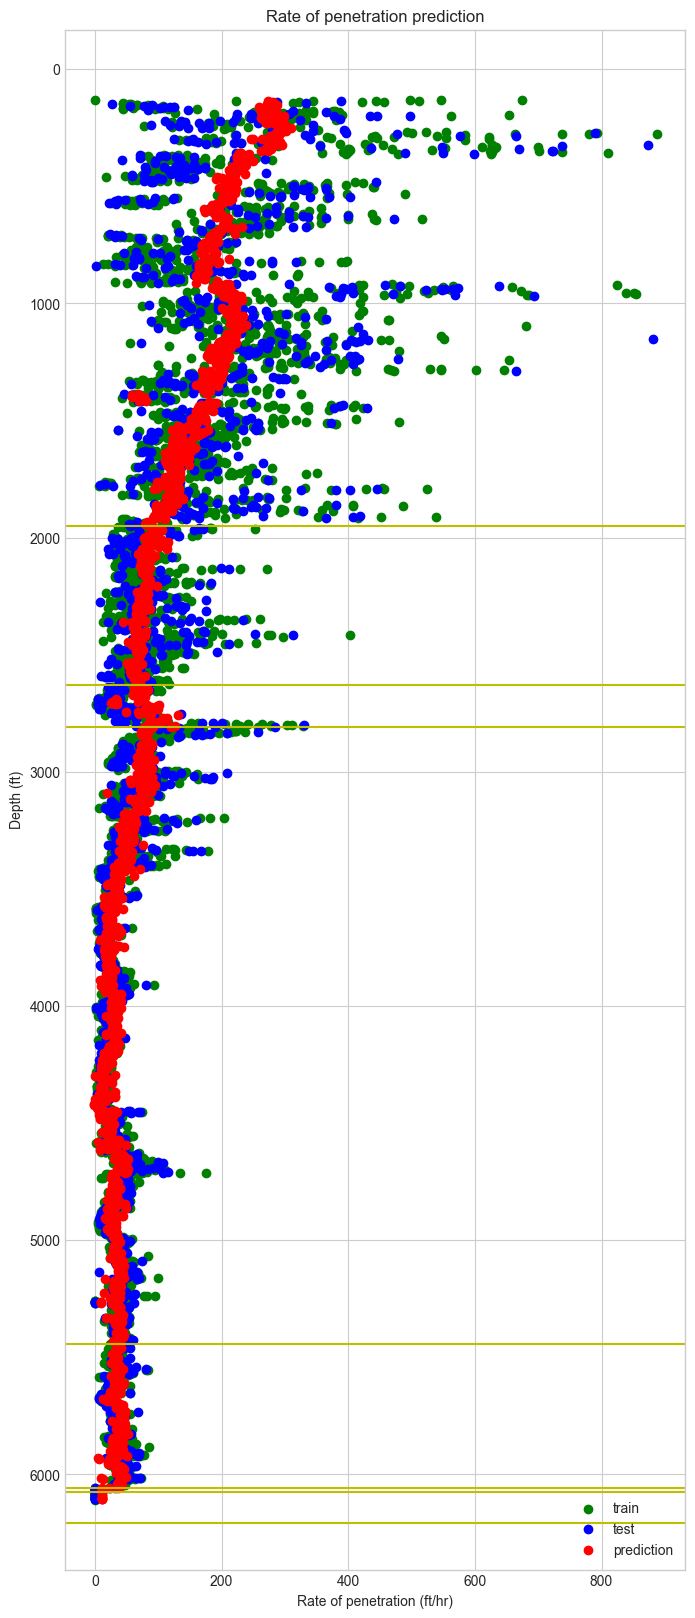

In [51]:
fig, ax=plt.subplots(figsize=(8,20))
#ax.plot(df1['ROP(1 ft)'], df1['Depth(m)'], color='blue')
ax.scatter(y_train, X_train[:,[0]], color='green', label="train")
ax.scatter(y_test, X_test[:,[0]], color='blue', label="test")
ax.scatter(predictions_sv_rescale_cv , X_test[:,[0]], color='red', label="prediction")
ay = plt.gca()
ay.set_ylim(ay.get_ylim()[::-1])
plt.ylabel('Depth (ft)'); plt.xlabel('Rate of penetration (ft/hr)'); plt.title('Rate of penetration prediction');
plt.legend(loc='lower right')
depth = [1950, 2630, 2810, 5445, 6060, 6075, 6210, 6950, 6960, 7200, 7230, 7320, 7350, 7360, 7370, 7390, 7400, 7470, 7480, 7510, 7540, 8100]
for i in range(len(depth)):
  plt.axhline(depth[i], color='y')
plt.show()
#print(X_test.shape, y_test.shape)

## Prediction with Neural networks 

In [52]:
nn_regressor= MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, 
                            power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False,  momentum=0.9, nesterovs_momentum=True, 
                           early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10)                   

In [53]:
model_nn=nn_regressor.fit(X_train_scaled, y_train_scaled)
predictions_nn = nn_regressor.predict(X_test_scaled)

In [54]:
print('Model score:', nn_regressor.score(X_test_scaled, y_test_scaled))
print('Mean absolute error:', mean_absolute_error(y_test_scaled, predictions_nn))
print('Root mean squared error:', sqrt(mean_squared_error(y_test_scaled, predictions_nn)))
print('R2:', r2_score(y_test_scaled, predictions_nn) )

Model score: 0.6339985040786009
Mean absolute error: 0.34982789140157117
Root mean squared error: 0.5958047889870283
R2: 0.6339985040786009


In [56]:
predictions_nn_rescale = scalery.inverse_transform(predictions_nn.reshape(-1,1), copy=None)


In [57]:
print('Mean absolute error:', mean_absolute_error(y_test, predictions_nn_rescale ))
print('Root mean squared error:', sqrt(mean_squared_error(y_test, predictions_nn_rescale )))

Mean absolute error: 40.90212387371327
Root mean squared error: 69.66191628135451


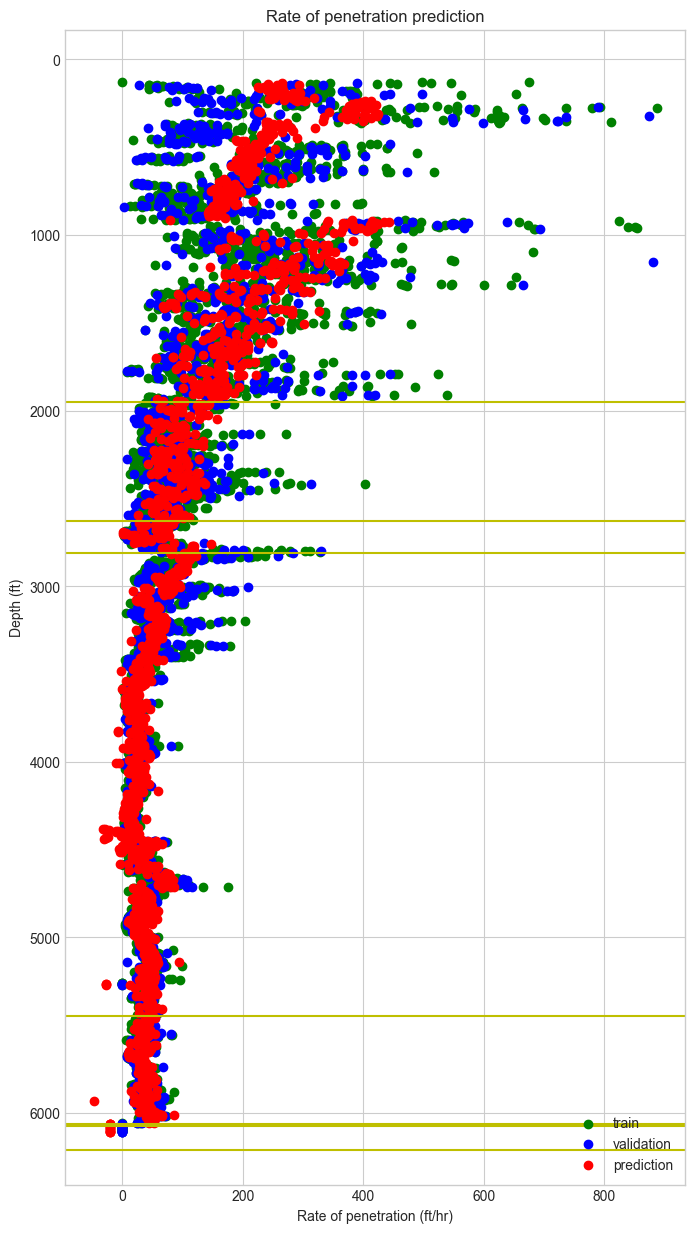

In [58]:

fig, ax=plt.subplots(figsize=(8,15))
ax.scatter(y_train, X_train[:,[0]], color='green', label="train")
ax.scatter(y_test, X_test[:,[0]], color='blue', label="validation")
ax.scatter(predictions_nn_rescale  , X_test[:,[0]], color='red', label="prediction")
ay = plt.gca()
ay.set_ylim(ay.get_ylim()[::-1])
plt.ylabel('Depth (ft)'); plt.xlabel('Rate of penetration (ft/hr)'); plt.title('Rate of penetration prediction');
plt.legend(loc='lower right')
depth = [1950, 2630, 2810, 5445, 6060, 6075, 6210, 6950, 6960, 7200, 7230, 7320, 7350, 7360, 7370, 7390, 7400, 7470, 7480, 7510, 7540, 8100]
for i in range(len(depth)):
  plt.axhline(depth[i], color='y')
plt.show()


In [59]:
# Look at parameters used by our current support vector regressor
print('Parameters currently in use:\n')
pprint(nn_regressor.get_params())

Parameters currently in use:

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}


In [60]:
# Solver 
solver = [ 'lbfgs', 'sgd', 'adam' ]
#Number of neurons in the hidden layer (s)
hidden_layer_sizes=[ 2, 3, 4, (2,1), (2,2), (3,1), (3,2), (3,3)]
# Activation function
activation=['identity', 'logistic', 'tanh', 'relu']
# L2 regularization 
alpha= [ 0.00001, 0.0001, 0.001, 0.01, 0.1 ]


# Create the random grid
random_grid_nn = {'solver': solver,
                  'hidden_layer_sizes': hidden_layer_sizes,
                   'activation': activation,
                   'alpha': alpha}

pprint(random_grid_nn)

{'activation': ['identity', 'logistic', 'tanh', 'relu'],
 'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1],
 'hidden_layer_sizes': [2, 3, 4, (2, 1), (2, 2), (3, 1), (3, 2), (3, 3)],
 'solver': ['lbfgs', 'sgd', 'adam']}


In [61]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
nn_cv_base = MLPRegressor(random_state=42)
# Random search of parameters, using 3 fold cross validation, 
# search across (100) different combinations, and use all available cores
nn_cv_random = RandomizedSearchCV(estimator=nn_cv_base, param_distributions=random_grid_nn,
                              n_iter = 10, 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
nn_cv_random.fit(X_train_scaled, y_train_scaled)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/Users/DanyTQ/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/DanyTQ/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/DanyTQ/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/DanyTQ/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversio

RandomizedSearchCV(cv=3, estimator=MLPRegressor(random_state=42), n_jobs=-1,
                   param_distributions={'activation': ['identity', 'logistic',
                                                       'tanh', 'relu'],
                                        'alpha': [1e-05, 0.0001, 0.001, 0.01,
                                                  0.1],
                                        'hidden_layer_sizes': [2, 3, 4, (2, 1),
                                                               (2, 2), (3, 1),
                                                               (3, 2), (3, 3)],
                                        'solver': ['lbfgs', 'sgd', 'adam']},
                   random_state=42, return_train_score=True, verbose=2)

In [62]:
nn_cv_random.best_params_

{'solver': 'lbfgs',
 'hidden_layer_sizes': 4,
 'alpha': 0.001,
 'activation': 'relu'}

### Evaluation of best parameters in test set

In [63]:
best_random_nn_cv = nn_cv_random.best_estimator_
best_random_nn_cv.fit(X_train_scaled, y_train_scaled)
predictions_best_random_nn_cv = best_random_nn_cv.predict(X_test_scaled)

print('Model score:', best_random_nn_cv.score(X_test_scaled, y_test_scaled))
print('Mean absolute error:', mean_absolute_error(y_test_scaled, predictions_best_random_nn_cv))
print('Root mean squared error:', sqrt(mean_squared_error(y_test_scaled, predictions_best_random_nn_cv)))
print('R2:', r2_score(y_test_scaled, predictions_best_random_nn_cv) )

Model score: 0.6038412992794485
Mean absolute error: 0.3778750266293203
Root mean squared error: 0.6198650623841424
R2: 0.6038412992794485


In [65]:
predictions_nn_rescale_cv = scalery.inverse_transform(predictions_best_random_nn_cv.reshape(-1,1), copy=None)

In [66]:
print('Mean absolute error:', mean_absolute_error(y_test, predictions_nn_rescale_cv ))
print('Root mean squared error:', sqrt(mean_squared_error(y_test, predictions_nn_rescale_cv )))


r2_nn=r2_score(y_test_scaled, predictions_best_random_nn_cv)
Mean_absolute_error_nn=mean_absolute_error(y_test, predictions_nn_rescale_cv )
Root_mean_squared_error_nn=sqrt(mean_squared_error(y_test, predictions_nn_rescale_cv))

Mean absolute error: 44.181414712394044
Root mean squared error: 72.47506042198135
